In [2]:
import numpy as np
import pandas as pd

In [3]:
import os 
import sys
sys.path.append(os.path.abspath('../common')) # add path to common functions

In [4]:
from preprocess import getdfs

train_df, valid_df = getdfs(data = 'text_seq', train_size = 1)

In [5]:
train_df.head()

,input_str,label
0,0000154364642718159661428002624223132284159626...,0
1,0004641596369515436422262614110471596262476161...,0
2,0001543626215965999614422464135806142624051159...,0
3,0000154364224641238614262159689561596284351061...,1
4,0004641899422154362069015966142624761262159661...,1


In [6]:
train_df['input_str'] = train_df['input_str'].apply(lambda x : x[3:])
valid_df['input_str'] = valid_df['input_str'].apply(lambda x : x[3:])

In [7]:
def insert_spaces(string):
  """Inserts spaces between all two characters in a string.
  Args:
    string: The input string.

  Returns:
    The string with spaces inserted between all two characters.
  """

  result = ""
  for i in range(len(string)):
    result += string[i]
    if i < len(string) - 1:
      result += " "
  return result


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer


# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(analyzer='char')

# Fit and transform the data
x_train = vectorizer.fit_transform(train_df["input_str"])
x_valid = vectorizer.transform(valid_df["input_str"])
y_train = train_df["label"]
y_valid = valid_df["label"]

In [14]:
from models import predict_random_forest, predict_xgboost, predict_mlp, predict_logistic_regression, predict_svc
from evaluate import evaluate_predictions

In [15]:
x_train

<7080x10 sparse matrix of type '<class 'numpy.float64'>'
	with 66978 stored elements in Compressed Sparse Row format>

==========Random Forest==========
              precision    recall  f1-score   support

     Class 0       0.47      0.50      0.49       252
     Class 1       0.43      0.40      0.42       237

    accuracy                           0.45       489
   macro avg       0.45      0.45      0.45       489
weighted avg       0.45      0.45      0.45       489

Accuracy is 0.4539877300613497
==========Random Forest==========


/home/arush-upadhyaya/anaconda3/envs/771/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:23:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


==========XGBoost==========
              precision    recall  f1-score   support

     Class 0       0.48      0.49      0.48       252
     Class 1       0.44      0.43      0.44       237

    accuracy                           0.46       489
   macro avg       0.46      0.46      0.46       489
weighted avg       0.46      0.46      0.46       489

Accuracy is 0.4621676891615542
==========XGBoost==========
==========Logistic Regression==========
              precision    recall  f1-score   support

     Class 0       0.50      0.60      0.55       252
     Class 1       0.46      0.36      0.40       237

    accuracy                           0.48       489
   macro avg       0.48      0.48      0.47       489
weighted avg       0.48      0.48      0.48       489

Accuracy is 0.48466257668711654
==========Logistic Regression==========
==========MLP==========
              precision    recall  f1-score   support

     Class 0       0.48      0.58      0.53       252
     Class 1  

/home/arush-upadhyaya/anaconda3/envs/771/lib/python3.12/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


==========SVC==========
              precision    recall  f1-score   support

     Class 0       0.57      0.21      0.31       252
     Class 1       0.50      0.83      0.62       237

    accuracy                           0.51       489
   macro avg       0.53      0.52      0.47       489
weighted avg       0.53      0.51      0.46       489

Accuracy is 0.5112474437627812
==========SVC==========


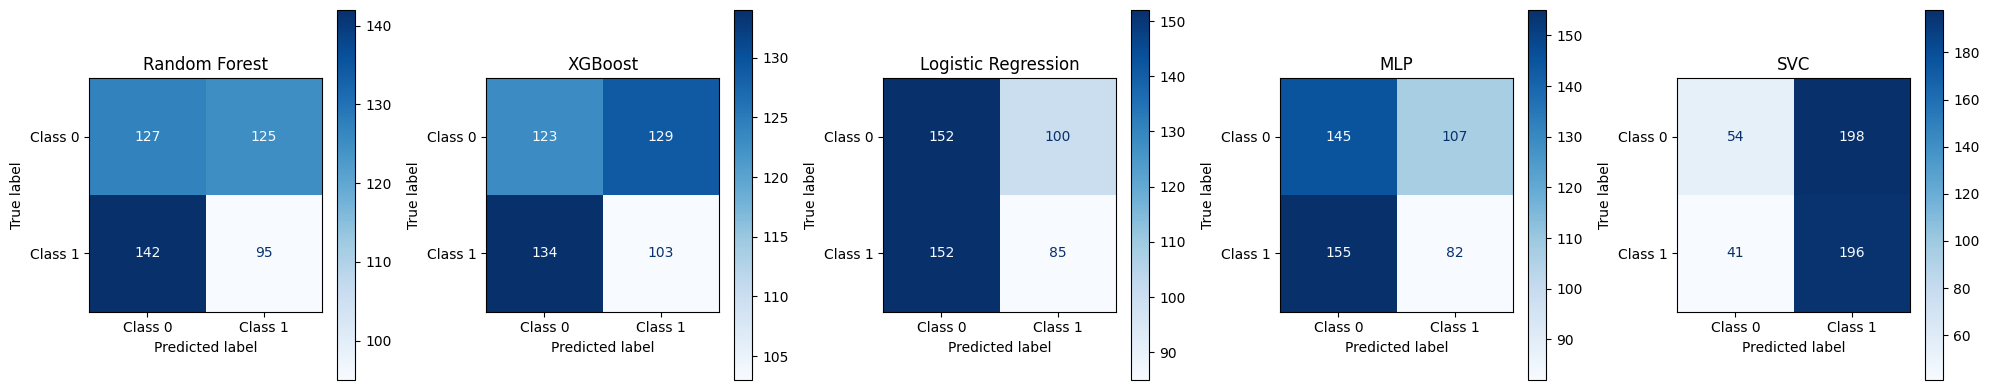

In [16]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 5, figsize=(20, 4))  # 1 row, 5 columns grid

y_pred_rf = predict_random_forest(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_rf, 'Random Forest', ax=axes[0])

y_pred_xgb = predict_xgboost(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_xgb, 'XGBoost', ax=axes[1])

y_pred_lr = predict_logistic_regression(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_lr, 'Logistic Regression', ax=axes[2])

y_pred_mlp = predict_mlp(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_mlp, 'MLP', ax = axes[3])

y_pred_svc = predict_svc(x_train, y_train, x_valid)
evaluate_predictions(y_valid, y_pred_svc, 'SVC', ax = axes[4])

plt.tight_layout()
plt.show()